<a href="https://colab.research.google.com/github/TeemuMikkonen/Dataxq/blob/main/Solita_x_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

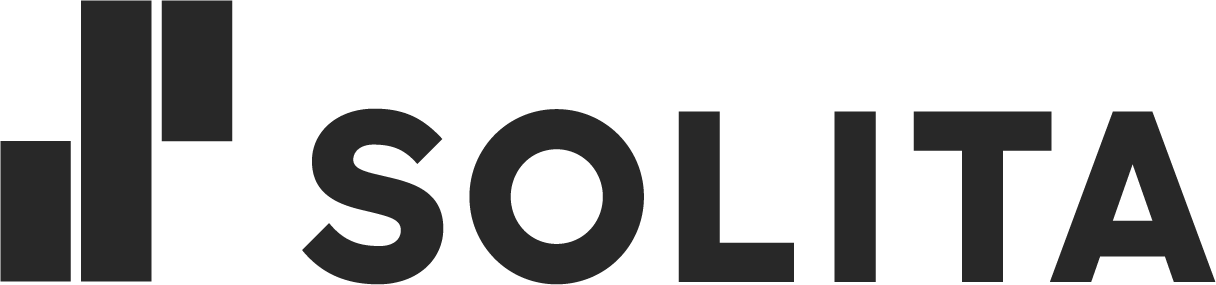


# Solita X Man@ger DataXQ

## Google Colaboratory

- Googlen ylläpitämä ilmainen Notebook-palvelu
- Helppo jakaa koodia ja työskennellä yhdessä mm. dataprojekteissa. (Tai harkkatöissä)
- Saatavilla myös laskentatehoa (GPU & TPU -prosessointi)
  >- Yläpalkki
  >- Runtime
  >- Change runtime type
  >- Hardware accelerator
  >- GPU 

- Tähän harjoitukseen ei kuitenkaan tarvita lisälaskentatehoa, datamäärät ovat pieniä ja käytettävät kirjastot eivät vaadi GPU-resursseja
- HUOM. Saatavat laskentaresurssit riippuvat vapaana olevasta kapasiteetista, laskentateho ei näin ollen ole vakio. 

#### Hyödyllisiä pikakomentoja
> - ctrl/cmd + enter = suorita solu
> - shift + enter = suorita solu ja siirry seuraavaan
> - ctrl/cmd + m + b = luo solu alapuolelle
> - ctrl/cmd + m + a = luo solu yläpuolelle
> - ctrl/cmd + d + d = poista solut

---



# Tehtävä:
- Asiakkaan myyntijohtaja haluaa tietää, mitkä seikat vaikuttavat heidän asiakkaidensa siirtymiseen kilpailijalle. Tämän lisäksi myyntijohtaja haluaa tulevaisuudessa ennustaa potentiaaliset riskiasiakkaat, joille asiakkuuden keskeytys on todennäköistä.

Myyntijohto on kerännyt tiedostoja asiakkaistaan, jotka sisältävät asiakkuuteen liittyvää dataa, sekä tiedon siitä onko asiakkuus katkaistu

## Toteutus: 
- Rakenna dataputki lukemaan asiakaspoistumasta kertovia tiedostoja
- Jalosta dataa muotoon, jossa se voidaan kirjoittaa tietokantaan ja käyttää useissa eri käyttötapauksissa
- Muodosta datan avulla koneoppimiseen perustuva malli, joka ennustaa historiadatan perusteella asiakkaan potentiaalia siirtyä kilpailijalle


### Dataputki ja asiakaspoistuman ennustaminen (Customer churn)
- Klassinen Data Science -esimerkkicase
- Dataprojekti, joka alkaa raakadatan vastaanottamisesta, käsittelystä ja tietokantaan kirjoittamisesta ja lopputuotteesta.



# Moderni data-alusta

Tässä casessa simuloidaan Data Engineerin työtä noudattelemalla modernin data platformin kaavaa.
- Datan kerääminen (Landing)
- Raakadatan siivous ja käsittely
- Datan kirjoitus tietokantaan
- Datan hyödyntäminen koneoppimisessa 

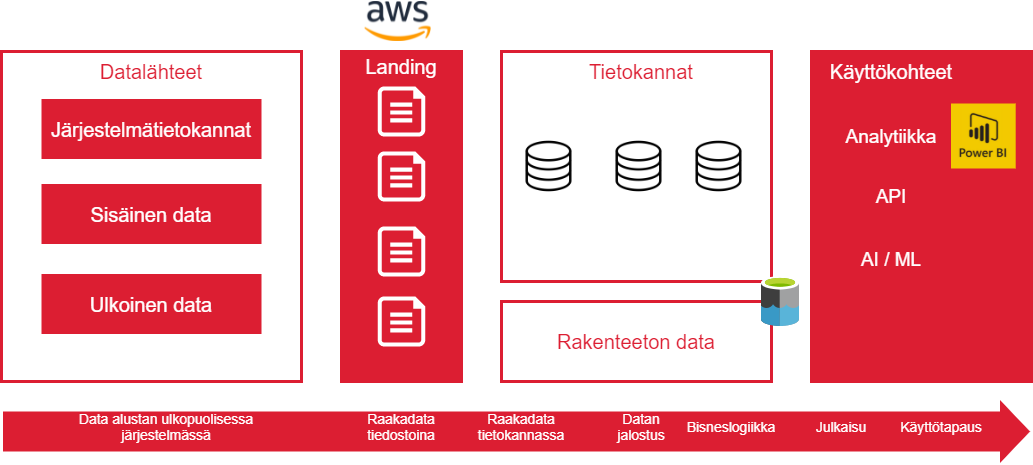

---

## 1. Valmistelevat toimenpiteet
- Importataan tarvittavat kirjastot koodia ja datan keräämistä varten

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Asennetaan AWS CLI datan hakemista varten

In [2]:
!pip install awscli
"AWScli asennettu"

     |████████████████████████████████| 3.7 MB 5.3 MB/s 
     |████████████████████████████████| 547 kB 33.9 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 8.0 MB 58.2 MB/s 
     |████████████████████████████████| 138 kB 53.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


'AWScli asennettu'

---

##  2. Datan kerääminen

Data luetaan AWS-pilvitarjoajan S3-bucketista. Simple Storage Service (S3) on tapa säilöä rakenteetonta dataa, kuten tiedostoja, kuvia, videoita jne.

Data Engineerin työsarka alkaa datan keräämisestä. Yleinen menetelmä datan siirtoon lähdejärjestelmästä, on kirjoittaa se tiedostoon S3-bucketin tyyppiseen tallennustilaan, josta se voidaan lukea haluttuun muotoon esimerkiksi Pythonin tai ELT/ETL-työkalun avulla

In [3]:
#Haetaan data S3-bucketista COLABin hakemistorakenteeseen

!aws s3 --no-sign-request cp s3://manager-dataxq/ . --recursive

download: s3://manager-dataxq/data/d_account.csv to data/d_account.csv
download: s3://manager-dataxq/data/telecom_churn_20201021_3.csv to data/telecom_churn_20201021_3.csv
download: s3://manager-dataxq/data/telecom_churn_20201021_2.csv to data/telecom_churn_20201021_2.csv
download: s3://manager-dataxq/data/telecom_churn_20201021_1.csv to data/telecom_churn_20201021_1.csv


---

## 3. Eksploratiivinen analyysi

Data Engineerin / Data Scientistin työssä dataan tutustuminen on tärkeää. Data voi poiketa paljonkin siitä, minkälaiseksi asiakas on sen kuvannut. Vaikka datan sisältö olisi dokumentoitu, dokumentointi ei välttämättä pidä sisällään tietoa siitä, käytetäänkö kaikkia kenttiä asianmukaisesti.

Tutkitaan mitä dataa hakemistosta luettiin, ja mitä tiedostot pitävät sisällään

In [153]:
!ls data

d_account.csv		      telecom_churn_20201021_2.csv
telecom_churn_20201021_1.csv  telecom_churn_20201021_3.csv


### Pandas DataFrame
DataFrame on tapa käsitellä taulukkomuotoista dataa Pythonin avulla. DataFramessa voidaan mm. toteuttaa taulukkolaskentaa, niitä voidaan muokata, yhdistellä ja kirjoittaa tiedostoiksi tai tietokantaan


In [5]:
df_exp = pd.read_csv("data/telecom_churn_20201021_1.csv")

print("Rivejä: ", df_exp.shape[0], "Sarakkeita", df_exp.shape[1], "\n")
df_exp.head()

Rivejä:  1007 Sarakkeita 16 



,account_id,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,10001,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,10002,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,10003,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,10004,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,10004,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


Tyypillisiesti datasta olisi hyvä selvittää yleisellä tasolla ainakin se, onko datassa duplikaatteja, rakenteellisia virheitä, poikkeavuuksia tai puuttuvia arvoja.
Mahdolliset duplikaatit voitaan löytää esimerkiksi datassa olevan avaimen perusteella:

Mahdolliset duplikaatit voitaan löytää esimerkiksi datassa olevan avaimen perusteella:


In [6]:

len(df_exp['account_id'].unique()) == len(df_exp['account_id'])


False

Duplikaatit ovat huomioitava datasetin muodostamisvaiheessa. Yleinen tapaus on esimerkiksi poistaa avaimeen liittyvistä duplikaateista toinen, riippuen tietenkin siitä, jos sitä ei tarvita/se on selkeästi virhe datassa.

Tiedostot ovat hyvä tarkisaa myös puuttuvien arvojen näkökulmasta. Tauluista duplikaatteja voi etsiä esimerkiksi sarakekohtaisesti tai vaikka kombinaatioilla komentoja:

In [7]:
df_exp[df_exp.isna().any(axis=1)]

,account_id,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
109,10106,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4,NaN
125,10121,0,210.2,92,35.73,227.3,77,19.32,200.1,116,9.00,13.1,7,3.54,1,NaN
146,10141,0,148.5,115,25.25,276.4,84,23.49,193.6,112,8.71,12.4,3,3.35,1,NaN
155,10150,43,257.7,97,43.81,162.1,95,13.78,286.9,86,12.91,11.1,4,3.00,2,NaN
159,10154,0,226.0,112,38.42,248.5,118,21.12,140.5,142,6.32,6.9,11,1.86,1,NaN
426,10421,28,206.9,126,35.17,264.4,126,22.47,171.8,124,7.73,9.3,11,2.51,2,NaN


Luettu data sisältää myös csv:n "d_account". Analyysin perusteella taulu sisältää kunkin asiakkaan tietoja, esimerkiksi maantietellisen sijainnin. Taulua voidaan käyttää siis kuvaamaan tarkemmin muissa tauluissa olevia asiakkaita. 

In [8]:
df_dim = pd.read_csv("data/d_account.csv")

print("Rivejä: ", df_dim.shape[0], "Sarakkeita", df_dim.shape[1], "\n")
df_dim.head()

Rivejä:  3333 Sarakkeita 6 



,account_id,State,Account length,Area code,International plan,Voice mail plan
0,10001,KS,128,415,No,Yes
1,10002,OH,107,415,No,Yes
2,10003,NJ,137,415,No,No
3,10004,OH,84,408,Yes,No
4,10005,OK,75,415,Yes,No


---

# 4. Datasetin muodostus ja siivous

Asiakaspoistuma-analyysissä käytettävä data on jaettu useaan tiedostoon. Tämä voi olla esimerkiksi lähdejärjestelmän ja S3-bucketin välisen ETL:n ominaisuus, jossa määritellään tiedostoista halutun kokoisia, jolloin esimerkiksi latausaikoja on helpompi arvioida. 

Luetaan tiedosto telecom_churn yhteen DataFrameen. Huomioidaan myös datan eksploratiivisessa tutkimuksessa havaitut seikat, ja suoritetaan niiden poistamiseen liittyvät toimenpiteet.

In [155]:
df_churn = pd.concat([pd.read_csv("data/" + i) for i in os.listdir("data") if i.startswith("telecom")], ignore_index = True)
df_churn = df_churn.drop_duplicates(keep='first').dropna(subset=['Churn'])
df_churn.shape

(3327, 16)

Tästä voidaan huomata, että df_dim- ja df_churn -dataframet käyttävät samaa avainta (account_id) Taulut voidaan siis yhdistää kyseisen avaimen avulla yhdeksi tauluksi. Yhdistämiseen käytetään df.join()-komentoa, jota käytetään hyvin samaan tyyliin kuin esimerkiksi SQL:n join-komentoa

In [59]:
df = df_dim.join(df_churn.set_index('account_id'), on='account_id', how="left")
df.head()

,account_id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,10001,KS,128,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,10002,OH,107,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,10003,NJ,137,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,10004,OH,84,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,10005,OK,75,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [61]:
df.head()

,account_id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,10001,KS,128,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False,303.0
1,10002,OH,107,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False,332.0
2,10003,NJ,137,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False,333.0
3,10004,OH,84,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False,255.0
4,10005,OK,75,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False,359.0


Eksploratiivisen analyysin tuloksista voi paljastua liiketoiminnalle hyödyllistä tietoa. Asiakkaan myyntijohtajaa voi kiinnostaa onko asiakaspoistumalla esimerkiksi alueellista hajontaa

In [13]:
churns = df.loc[df["Churn"] == True ]
# suhdeluku osavaltioittain kaikki asiakkaat /churnatut

states = churns["State"].value_counts(normalize = True)
import plotly.express as px
fig = px.choropleth(locations=states.index,
                    locationmode="USA-states",
                    color=states, scope="usa")
  
fig.show()

---

# 5. Datan kirjoittaminen tietokantaan

Data Engineering -projektien työnkulku on hyvin usein tiedostojen datasisällön lukeminen, käsitteleminen ja kirjoittaminen relaatiotietokantaan. 

Tässä vaiheessa luodaan SQLite-tietokanta, jonne luodaan taulut d_account ja f_churn

In [14]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection succesful")
    except Error as e:
        print(e)
    
    return conn


db_name = "customer_churn.db"
create_connection(db_name)

Connection succesful


In [15]:
def write_db(df, table):

    db_name = "customer_churn.db"
    try:
        conn = sqlite3.connect(db_name)
        df.to_sql(table, con = conn, if_exists = "replace", index = False)
        print("Insert Successful to table: " + table)
        
    except sqlite3.Error as e:
        print(e)
    conn.close()

write_db(df_churn, "f_customer_churn")
write_db(df_dim, "d_account")


Insert Successful to table: f_customer_churn
Insert Successful to table: d_account


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



## Tietokantakysely

Data on nyt kirjoitettu tietokantaan. Dataa voidaan nyt kysellä SQL-lauseilla alla olevan funktion avulla

In [16]:
def query_db(sql):
  try:
    conn = sqlite3.connect(db_name)
    query = conn.cursor().execute(sql)
    cols = [column[0] for column in query.description]

    results = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
    display(results)
  except sqlite3.Error as e:
    print(e)

  conn.close()

query_db("SELECT * FROM d_account acc LEFT JOIN f_customer_churn cc on acc.account_id = cc.account_id")

,account_id,State,Account length,Area code,International plan,Voice mail plan,account_id,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,10001,KS,128,415,No,Yes,10001.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,10002,OH,107,415,No,Yes,10002.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,10003,NJ,137,415,No,No,10003.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,10004,OH,84,408,Yes,No,10004.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,10005,OK,75,415,Yes,No,10005.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,13329,AZ,192,415,No,Yes,13329.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,0.0
3329,13330,WV,68,415,No,No,13330.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,0.0
3330,13331,RI,28,510,No,No,13331.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,0.0
3331,13332,CT,184,510,Yes,No,13332.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,0.0


---

## 6. Asiakaspoistuman ennustemalli

Ennustemallia varten muodostetaan datasetti, jota voidaan käyttää koneoppimismallin koulutuksessa. Muodostetaan kaksi DataFramea df_churn -dataFramesta:
- X sisältää asiakasdatan 
- Y sisältää tiedon siitä, onko ko. asiakas keskeyttänyt asiakkuuden

In [68]:
 X = df_churn.drop(["Churn", "account_id"], axis = 1)
 y = df_churn["Churn"]

In [104]:
df_churn.sort_values("account_id")

,account_id,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1333,10001,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1334,10002,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
1335,10003,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
1336,10004,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
1338,10005,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,13329,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
1329,13330,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
1330,13331,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
1331,13332,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Ohjatun koneoppimismallin (Supervised model) opettamiseen tarvitaan siis data (X) ja tunniste (Y), jonka perusteella malli opetetaan tunnistamaan tekijöitä, jotka vaikuttavat asiakaspoistuman muodostumiseen. Mallin testaamiseksi opetusdatasta pilkotaan tietty osuus datasta, jonka perusteella voidaan arvioida miten hyvin malli oppii tunnistamaan potentiaalisen asiakaspoistuman. 

Aineisto jaotellaan siis opetusjoukkoon (**train**) ja testijoukkoon (**test**). Sama jako tehdään tunnisteille. Tässä tapauksessa testijoukoksi irroitetaan 20 % aineistosta.

Testijoukon alkiot muunnetaan kokonaisluvuiksi. True = 1, False = 0

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Opetusdatan muodostamisen jälkeen voidaan kouluttaa koneoppimismalli. Tässä tapauksessa koneoppimiseen hyödynnetään Random Forest -algoritmia. Mallin kouluttamisen jälkeen sille voidaan syöttää asiakaspoistumadataa, jolloin malli ennustaa datalle tunnisteen (Churn, No Churn)

In [128]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

#### Koneoppimismallin testaaminen ja tunnusluvut

- Jotta malli voidaan ottaa käyttöön, on arvioitava sen toimintaa. 
- Tätä varten mallille syötetään testijoukko, jonka ennusteita verrataan totuuteen

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       571
           1       0.88      0.46      0.61        95

    accuracy                           0.91       666
   macro avg       0.90      0.73      0.78       666
weighted avg       0.91      0.91      0.90       666

Accuracy: 0.9144144144144144


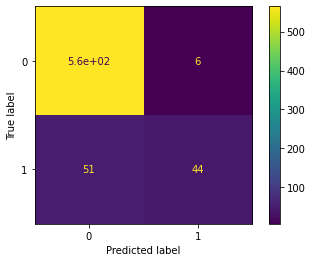

In [129]:
print(classification_report(y_test,predictions ))  
print("Accuracy:",(accuracy_score(y_test, predictions )))
plot_confusion_matrix(classifier, X_test, y_test)


### Miten ennustemallin tunnuslukuja luetaan
 - Precision:
 - Recall
 - Accuracy:  

 Minkä takia pelkkä accuracy voi olla harjaanjohtava mittari? Vinkki: Tarkista asiakaspoistuma-aineiston jakauma

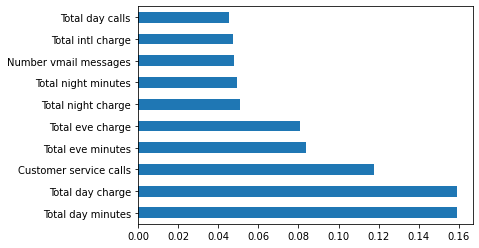

In [125]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Mallin käyttäminen

Opetettua mallia voidaan nyt käyttää liiketoiminnan tarkoitukseen syöttämällä sille dataa samassa muodossa kuin missä se on opetettu. Demonstroidaan tämä testijoukon datan kymmenellä ensimmäisellä rivillä

In [152]:
valid = X_test[:10]

valid["Predicted"] = classifier.predict(valid)
valid["Actual"] = y_test[:10]
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Predicted,Actual
2181,0,239.2,114,40.66,150.0,115,12.75,160.8,81,7.24,10.3,2,2.78,5,0,0
2891,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,0,1
879,26,146.6,68,24.92,172.8,67,14.69,173.8,113,7.82,10.0,2,2.70,1,0,0
1750,0,97.2,80,16.52,186.2,90,15.83,189.0,92,8.50,10.4,6,2.81,2,0,0
2711,0,169.4,102,28.80,253.5,113,21.55,197.1,93,8.87,8.9,5,2.40,1,0,0
1138,0,147.2,121,25.02,175.2,87,14.89,136.3,80,6.13,13.3,3,3.59,2,0,0
2720,0,116.8,119,19.86,123.1,123,10.46,217.5,101,9.79,12.0,2,3.24,1,0,0
1784,0,165.4,107,28.12,196.0,126,16.66,349.2,110,15.71,9.6,7,2.59,2,0,0
599,0,225.1,90,38.27,279.5,127,23.76,233.8,103,10.52,8.8,4,2.38,0,1,1
2422,0,215.6,115,36.65,216.2,85,18.38,171.3,65,7.71,11.8,1,3.19,3,0,0


---

# Yhteenveto


Harjoituksessa toteutettiin Data Engineerin ja Data Scientistin projekti. Toteutimme seuraavat työvaiheet:

#### Data Engineer

- Datan lukeminen landing-alueelta (S3)
- Dataan tutustuminen / eksploratiivinen analyysi
- Datan siivous ja käsittely
- SQLite3 tietokannan alustus ja datan kirjoittaminen tauluihin d_account, f_customer_churn

#### Data Scientist

- Datan käsittely koneoppimismallin edellyttämään muotoon -> datasetti
- Datasetin jako opetus- ja testijoukkoon (train/test split)
- Mallin koulutus
- Mallin testaus ja arvionti tunnuslukujen perusteella
- Mallin käyttö

### Ajatuksia

Tässä harjoituksessa kaksi datajoukkoa. Dataprojekteissa voi olla satoja tauluja, joiden sisällöstä asiakaskaan ei välttämättä tiedä.

Data Science-puolella tyypillinen ongelma on, että liiketoimintaongelmaan vastaava malli saadaan koulutettua, mutta se unohtuu kokeiluksi johonkin levynkulmalle. Tähän pyritään vastaamaan ottamaan projekteissa käyttöön ketterän ohjelmistokehityksen menetelmät myös datapuolelle (DataOps, MLOps)

Dataprojektin tarkoitus on tukea liiketoimintaa. Asiakas ei kuitenkaan välttämättä tiedä mitä dataa oikeasti tarvitaan tai miten tätä dataa voidaan liiketoiminnan tukena hyödyntää. Datakonsultin tehtävä on siis teknisen ulottuvuuden lisäksi ymmärtää asiakkaan liiketoimintaa ja kommunikoida asiakkaan ja teknisen toteutuksen välissä. 

Tämä kuulostanee tietojohtajille tutulta? 




Luettavaa: 

https://data.solita.fi/

https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488

https://data.solita.fi/mlops-from-data-scientists-computer-to-production/
